In [1]:
#Linear Support Vector Machine

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [3]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler


In [6]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

In [7]:
SVMdata = pd.read_csv(r"C:\Users\thump\OneDrive\Desktop\Final Project Literature Survey\Data Preprocessing\Preprocesseddata.csv")

In [8]:
SVMdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,2,2,1,2,0.256419,1,2,0,5,1,0.011016,1,-1,0,0,2
1,44,3,1,2,2,-0.437895,1,2,0,5,1,-0.416127,1,-1,0,0,2
2,33,8,2,2,2,-0.446762,1,1,0,5,1,-0.707361,1,-1,0,0,2
3,47,1,2,0,2,0.047205,1,2,0,5,1,-0.645231,1,-1,0,0,2
4,33,0,1,0,2,-0.447091,2,2,0,5,1,-0.233620,1,-1,0,0,2


In [9]:
X = SVMdata.drop('y',axis=1).values

In [10]:
Y = SVMdata.y

In [12]:
SVM = LinearSVC(dual=False)

In [13]:
scalar = StandardScaler()

In [14]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.4, random_state = 0)

In [15]:
pipeline = Pipeline([('transforming',scalar), ('estimator', SVM)])
pipeline.fit(x_train,y_train)
y_pred = pipeline.predict(x_test)

In [ ]:
#Evaluation metrics for unbalanced dataset.

Accuracy for SVM on Unbalanced dataset is  0.8956593862316837
Balanced Accuracy for SVM on Unbalanced dataset is  0.6195470522046798
Recall/Sensitivity for SVM on Unbalanced dataset is  0.25845864661654133
f1_score for SVM on Unbalanced dataset is  0.36826247070639434


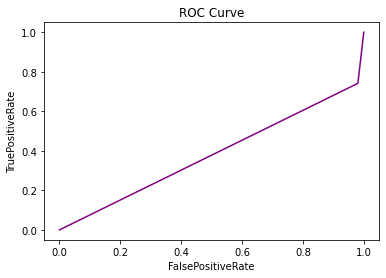

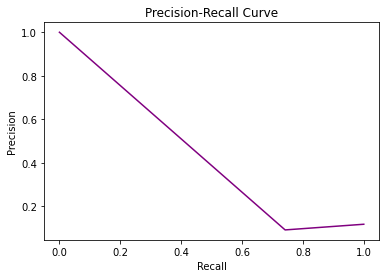

In [16]:
Test_accuracy = accuracy_score(y_test,y_pred)
print("Accuracy for SVM on Unbalanced dataset is ",Test_accuracy)

# Balanced Accuracy 
Balanced_Accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy for SVM on Unbalanced dataset is ",Balanced_Accuracy)

#Recall/Sensitivity
Recall = recall_score(y_test,y_pred,pos_label = 1)
print("Recall/Sensitivity for SVM on Unbalanced dataset is ",Recall)

# F1 score
f1score = f1_score(y_test,y_pred,pos_label = 1)
print("f1_score for SVM on Unbalanced dataset is ",f1score)

#ROC CURVE
fpr, tpr, thresholds = roc_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='purple')

ax.set_title('ROC Curve')
ax.set_ylabel('TruePositiveRate')
ax.set_xlabel('FalsePositiveRate')
plt.show()

#Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

In [ ]:
# Oversampling Minority class using SMOTE

In [17]:
smtsvm = SMOTE(sampling_strategy = 0.5,random_state = 0)

In [18]:
X_over,Y_over = smtsvm.fit_resample(X,Y)
print(Counter(Y_over))

Counter({2: 39922, 1: 19961})


In [19]:
x_train,x_test,y_train,y_test = train_test_split(X_over,Y_over,test_size = 0.4, random_state = 0)

In [20]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('transforming', StandardScaler()),
                ('estimator', LinearSVC(dual=False))])

In [21]:
y_pred = pipeline.predict(x_test)

In [ ]:
#Evaluation metrics for oversampled minority class

Accuracy for SVM on OverSampled dataset is  0.8168990565250063
Balanced Accuracy for SVM on OverSampled dataset is  0.773680848435625
Recall/Sensitivity for SVM on OverSampled dataset is  0.6438853423457254
f1_score for SVM on OverSampled dataset is  0.7011039934578165


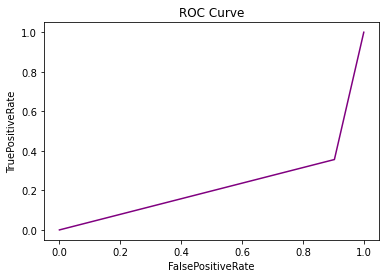

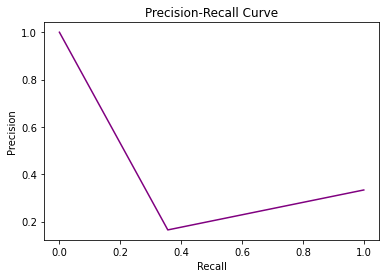

In [23]:
Test_accuracy = accuracy_score(y_test,y_pred)
print("Accuracy for SVM on OverSampled dataset is ",Test_accuracy)

# Balanced Accuracy 
Balanced_Accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy for SVM on OverSampled dataset is ",Balanced_Accuracy)

#Recall/Sensitivity
Recall = recall_score(y_test,y_pred,pos_label = 1)
print("Recall/Sensitivity for SVM on OverSampled dataset is ",Recall)

# F1 score
f1score = f1_score(y_test,y_pred,pos_label = 1)
print("f1_score for SVM on OverSampled dataset is ",f1score)

#ROC CURVE
fpr, tpr, thresholds = roc_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='purple')

ax.set_title('ROC Curve')
ax.set_ylabel('TruePositiveRate')
ax.set_xlabel('FalsePositiveRate')
plt.show()

#Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

In [ ]:
# Oversampling Minority class using SMOTE and cleaning with tomek link

In [30]:
tlsvm = TomekLinks(sampling_strategy = 'not majority')
X_over_clean,Y_over_clean = tlsvm.fit_resample(X_over,Y_over)

In [31]:
print(Counter(Y_over_clean))

Counter({2: 39922, 1: 19795})


In [32]:
x_train,x_test,y_train,y_test = train_test_split(X_over_clean,Y_over_clean,test_size = 0.4, random_state = 0)

In [33]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('transforming', StandardScaler()),
                ('estimator', LinearSVC(dual=False))])

In [34]:
y_pred = pipeline.predict(x_test)

In [ ]:
#Evaluation metrics for oversampled minority class

Accuracy for SVM on Oversampled and cleaned dataset is  0.8203625402938837
Balanced Accuracy for SVM on Oversampled and cleaned dataset is  0.7747123864344796
Recall/Sensitivity for SVM on Oversampled and cleaned dataset is  0.6384237693566662
f1_score for SVM on Oversampled and cleaned dataset is  0.7026952123605626


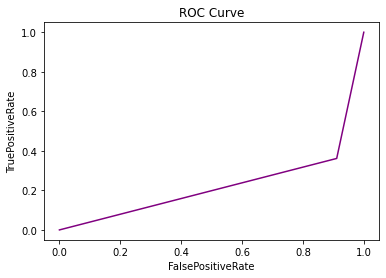

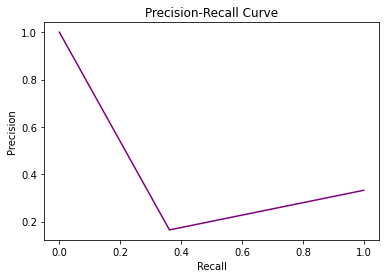

In [35]:
Test_accuracy = accuracy_score(y_test,y_pred)
print("Accuracy for SVM on Oversampled and cleaned dataset is ",Test_accuracy)

# Balanced Accuracy 
Balanced_Accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy for SVM on Oversampled and cleaned dataset is ",Balanced_Accuracy)

#Recall/Sensitivity
Recall = recall_score(y_test,y_pred,pos_label = 1)
print("Recall/Sensitivity for SVM on Oversampled and cleaned dataset is ",Recall)

# F1 score
f1score = f1_score(y_test,y_pred,pos_label = 1)
print("f1_score for SVM on Oversampled and cleaned dataset is ",f1score)

#ROC CURVE
fpr, tpr, thresholds = roc_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='purple')

ax.set_title('ROC Curve')
ax.set_ylabel('TruePositiveRate')
ax.set_xlabel('FalsePositiveRate')
plt.show()

#Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

# Undersampling majority class using Random Undersampling

In [36]:
randomUnderSampleSVM = RandomUnderSampler(sampling_strategy = 0.41 ,random_state = 0)

In [37]:
X_under,Y_under = randomUnderSampleSVM.fit_resample(X,Y)
print(Counter(Y_under))

Counter({2: 12900, 1: 5289})


In [38]:
x_train,x_test,y_train,y_test = train_test_split(X_under,Y_under,test_size = 0.4, random_state = 0)

In [39]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('transforming', StandardScaler()),
                ('estimator', LinearSVC(dual=False))])

In [40]:
y_pred = pipeline.predict(x_test)

In [ ]:
#Evaluation metrics 

Accuracy for SVM on Undersampled dataset is  0.8261407366684992
Balanced Accuracy for SVM on Undersampled dataset is  0.7466023397565884
Recall/Sensitivity for SVM on Undersampled dataset is  0.5647288715192965
f1_score for SVM on Undersampled dataset is  0.6463516913614761


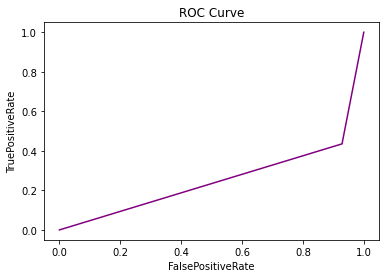

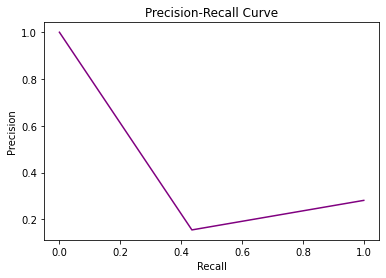

In [41]:
Test_accuracy = accuracy_score(y_test,y_pred)
print("Accuracy for SVM on Undersampled dataset is ",Test_accuracy)

# Balanced Accuracy 
Balanced_Accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy for SVM on Undersampled dataset is ",Balanced_Accuracy)

#Recall/Sensitivity
Recall = recall_score(y_test,y_pred,pos_label = 1)
print("Recall/Sensitivity for SVM on Undersampled dataset is ",Recall)

# F1 score
f1score = f1_score(y_test,y_pred,pos_label = 1)
print("f1_score for SVM on Undersampled dataset is ",f1score)

#ROC CURVE
fpr, tpr, thresholds = roc_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='purple')

ax.set_title('ROC Curve')
ax.set_ylabel('TruePositiveRate')
ax.set_xlabel('FalsePositiveRate')
plt.show()

#Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

# Cleaning Undersampled majority class using Random Undersampling and tomeklinks

In [42]:
TL_under_clean = TomekLinks(sampling_strategy = 'majority')
X_under_clean,Y_under_clean = TL_under_clean.fit_resample(X_under,Y_under)
print(Counter(Y_under_clean))
x_train,x_test,y_train,y_test = train_test_split(X_under_clean,Y_under_clean,test_size = 0.4, random_state = 0)

Counter({2: 12060, 1: 5289})


In [43]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('transforming', StandardScaler()),
                ('estimator', LinearSVC(dual=False))])

In [44]:
y_pred = pipeline.predict(x_test)

In [ ]:
#Evaluation metrics for Undersampled and cleaned dataset

Accuracy for SVM on Undersampled and cleaned dataset is  0.8380403458213257
Balanced Accuracy for SVM on Undersampled and cleaned dataset is  0.7748726722903072
Recall/Sensitivity for SVM on Undersampled and cleaned dataset is  0.6194174757281553
f1_score for SVM on Undersampled and cleaned dataset is  0.6942328618063112


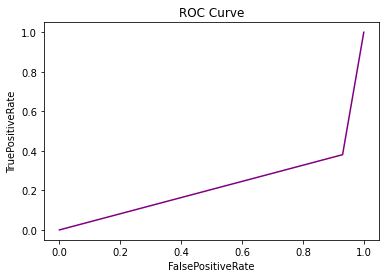

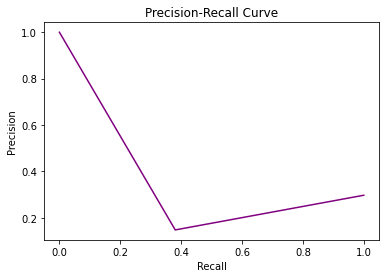

In [45]:
Test_accuracy = accuracy_score(y_test,y_pred)
print("Accuracy for SVM on Undersampled and cleaned dataset is ",Test_accuracy)

# Balanced Accuracy 
Balanced_Accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy for SVM on Undersampled and cleaned dataset is ",Balanced_Accuracy)

#Recall/Sensitivity
Recall = recall_score(y_test,y_pred,pos_label = 1)
print("Recall/Sensitivity for SVM on Undersampled and cleaned dataset is ",Recall)

# F1 score
f1score = f1_score(y_test,y_pred,pos_label = 1)
print("f1_score for SVM on Undersampled and cleaned dataset is ",f1score)

#ROC CURVE
fpr, tpr, thresholds = roc_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='purple')

ax.set_title('ROC Curve')
ax.set_ylabel('TruePositiveRate')
ax.set_xlabel('FalsePositiveRate')
plt.show()

#Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

# Overall Balanced data

In [46]:
print(Counter(Y))
print(Counter(Y_over))
randomUnderSample_balanced = RandomUnderSampler(sampling_strategy = 1 ,random_state = 0)
X_overall,Y_overall = randomUnderSample_balanced.fit_resample(X_over,Y_over)
print(Counter(Y_overall))
x_train,x_test,y_train,y_test = train_test_split(X_overall,Y_overall,test_size = 0.4, random_state = 0)

Counter({2: 39922, 1: 5289})
Counter({2: 39922, 1: 19961})
Counter({1: 19961, 2: 19961})


In [47]:
pipeline_overall = Pipeline([('transforming',scalar), ('estimator', SVM)])

In [48]:
pipeline_overall.fit(x_train,y_train)

Pipeline(steps=[('transforming', StandardScaler()),
                ('estimator', LinearSVC(dual=False))])

In [49]:
y_pred = pipeline_overall.predict(x_test)

In [ ]:
#Evaluation metrics for Undersampled and cleaned dataset

Accuracy for SVM on balanced dataset is  0.8294821216106206
Balanced Accuracy for SVM on balanced dataset is  0.8294902161647822
Recall/Sensitivity for SVM on balanced dataset is  0.8195469903641597
f1_score for SVM on balanced dataset is  0.8278869856519815


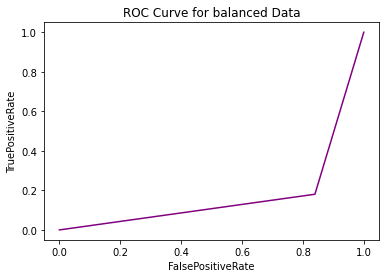

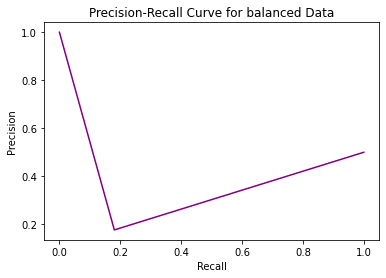

In [50]:
Test_accuracy_over = accuracy_score(y_test,y_pred)
print("Accuracy for SVM on balanced dataset is ",Test_accuracy_over)

# Balanced Accuracy 
Balanced_Accuracy_over = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy for SVM on balanced dataset is ",Balanced_Accuracy_over)

#Recall/Sensitivity
Recall_over = recall_score(y_test,y_pred,pos_label = 1)
print("Recall/Sensitivity for SVM on balanced dataset is ",Recall_over)

# F1 score
f1score_over = f1_score(y_test,y_pred,pos_label = 1)
print("f1_score for SVM on balanced dataset is ",f1score_over)

#ROC CURVE for balanced data
fpr_over, tpr_over, thresholds_over = roc_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(fpr_over, tpr_over, color='purple')

ax.set_title('ROC Curve for balanced Data')
ax.set_ylabel('TruePositiveRate')
ax.set_xlabel('FalsePositiveRate')
plt.show()

#Precision-Recall Curve for balanced data
precision_over, recall_over, thresholds_over = precision_recall_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(recall_over, precision_over, color='purple')

ax.set_title('Precision-Recall Curve for balanced Data')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

In [ ]:
#Overall - Balanced and Cleaned Dataset

In [51]:
svmclean_balanced = TomekLinks(sampling_strategy='all')
X_balanced_clean,Y_balanced_clean = svmclean_balanced.fit_resample(X_overall,Y_overall)
print(Counter(Y_balanced_clean))

Counter({1: 19831, 2: 19831})


In [52]:
x_train,x_test,y_train,y_test = train_test_split(X_balanced_clean,Y_balanced_clean,test_size = 0.4, random_state = 0)

In [53]:
pipeline_overall.fit(x_train,y_train)

Pipeline(steps=[('transforming', StandardScaler()),
                ('estimator', LinearSVC(dual=False))])

In [54]:
y_pred = pipeline_overall.predict(x_test)

In [ ]:
#Evaluation metrics on overall balaned and claeaned data set.

Accuracy for SVM on balanced and cleaned dataset is  0.8298770879294044
Balanced Accuracy for SVM on balanced and cleaned dataset is  0.8298464678164195
Recall/Sensitivity for SVM on balanced and cleaned dataset is  0.8179979777553084
f1_score for SVM on balanced and cleaned dataset is  0.8274627628971425


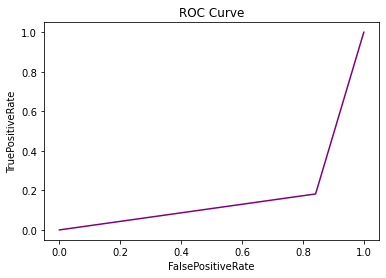

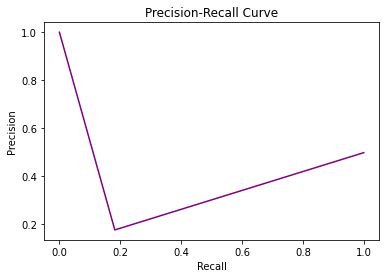

In [55]:
Test_accuracy = accuracy_score(y_test,y_pred)
print("Accuracy for SVM on balanced and cleaned dataset is ",Test_accuracy)

# Balanced Accuracy 
Balanced_Accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy for SVM on balanced and cleaned dataset is ",Balanced_Accuracy)

#Recall/Sensitivity
Recall = recall_score(y_test,y_pred,pos_label = 1)
print("Recall/Sensitivity for SVM on balanced and cleaned dataset is ",Recall)

# F1 score
f1score = f1_score(y_test,y_pred,pos_label = 1)
print("f1_score for SVM on balanced and cleaned dataset is ",f1score)

#ROC CURVE
fpr, tpr, thresholds = roc_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='purple')

ax.set_title('ROC Curve')
ax.set_ylabel('TruePositiveRate')
ax.set_xlabel('FalsePositiveRate')
plt.show()

#Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

In [ ]:
#Serializing the model using sklearn pickle

In [56]:
import pickle

In [57]:
pickle.dump(pipeline_overall,open('svmmodel.pkl','wb'))

In [58]:
pickeled_svm = pickle.load(open('svmmodel.pkl','rb'))

In [59]:
print(pickeled_svm.predict([[31,1,2,3,2,54,1,2,1,18,1,239,6,-1,0,0]]))

[1]
